In [1]:
%pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
import seaborn as sns

In [4]:
# 模擬數據：廣告預算（自變數）和銷售額（因變數）
# Simulated Data: Advertising Budget (Independent Variable) and Sales Revenue (Dependent Variable)

np.random.seed(42)
n = 100
ad_budget = np.random.normal(10000, 2000, n)  # 廣告預算 Advertising Budget
noise = np.random.normal(0, 5000, n)
sales = 5000 + 2.5 * ad_budget + noise  # 銷售額 Sales Revenue = 截距 Intercept + 廣告影響 Advertising Effect+ 噪音 Noise

In [5]:
# 整理成 DataFrame
# Organize into a DataFrame

df = pd.DataFrame({
    'Ad_Budget': ad_budget,
    'Sales': sales
})

In [6]:
# 建立迴歸模型 Build the Regression Model
X = sm.add_constant(df['Ad_Budget'])  # 加入截距項 Add Intercept Term
y = df['Sales']
model = sm.OLS(y, X).fit()

In [7]:
# 顯示統計摘要（含 R²、P 值、係數）
# Display Statistical Summary (including R², P-values, Coefficients)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     66.47
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           1.20e-12
Time:                        14:36:54   Log-Likelihood:                -987.43
No. Observations:                 100   AIC:                             1979.
Df Residuals:                      98   BIC:                             1984.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8618.5682   2615.995      3.295      0.0

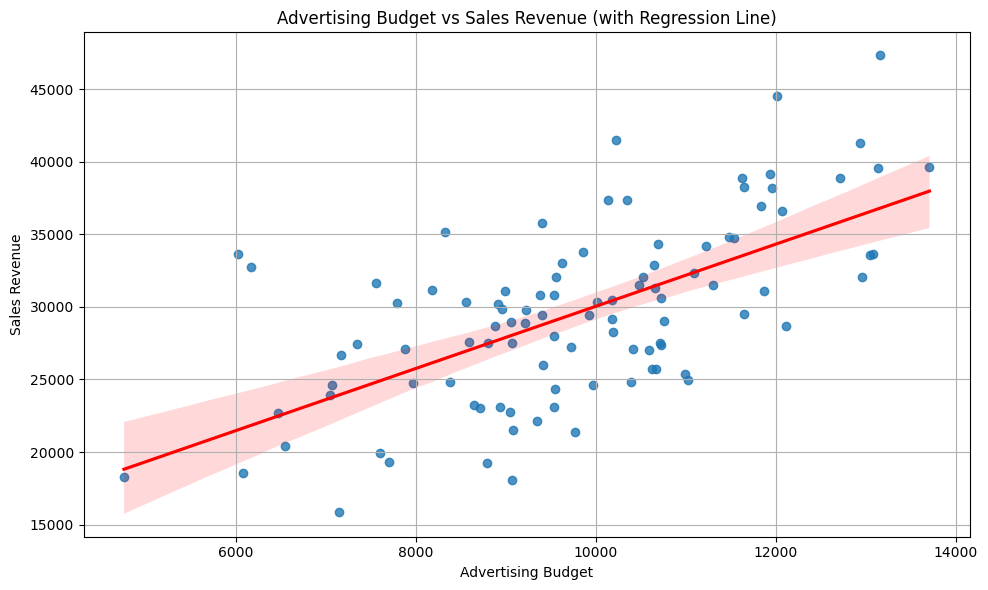

In [8]:
# 繪圖：廣告預算 vs 銷售額（含迴歸線）
# Plot: Advertising Budget vs. Sales Revenue (with Regression Line)

plt.figure(figsize=(10, 6))
sns.regplot(x='Ad_Budget', y='Sales', data=df, line_kws={"color": "red"})
plt.title('Advertising Budget vs Sales Revenue (with Regression Line)')
plt.xlabel('Advertising Budget')
plt.ylabel('Sales Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()